In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from matplotlib import figure
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn import linear_model
from sklearn import ensemble
from sklearn import svm
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
import optuna
from optuna.samplers import TPESampler
import joblib
import os
plt.rcParams['figure.figsize'] = [10, 5]  # size
plt.rcParams['figure.dpi'] = 100 # better quality of plots

In [2]:
class datapreparation:
    def __init__(self) -> None:
        pass
    
    def extraire_top_car_per_column_name(self,dataframe,columnName,n):
        """
        eliminer les marques qui ont un nombre de voiture inférieur à n dans la base de donnée actuelle
        exemple:
        n=20
        Je supprime toutes les lignes de la marque fiat car fiat a 19 voitures.
        De meme pour le modele 
        """
        category_counts = dataframe[columnName].value_counts().to_dict()
        column = list(category_counts.keys())
        filtered_category_counts = {column: count for column, count in category_counts.items() if count > n}
        column = list(filtered_category_counts.keys())
        dataexp=dataframe.loc[dataframe[columnName].isin(column),:]
        dataexp.drop(columns=["Unnamed: 0"],inplace=True) if "Unnamed: 0" in dataexp.columns else dataexp
        return dataexp
    
    def remove_outliers(self,group,min_value,max_value):
        """
        Supprimer les valeurs aberrantes par marque
        """
        lower_bound = group['Prix'].quantile(min_value)
        upper_bound = group['Prix'].quantile(max_value)
        return group[(group['Prix'] >= lower_bound) & (group['Prix'] <= upper_bound)]
    
    def Boxplot_figure(self,dataframe):
        """
        Boite à moustache pour la visualisation des valeurs aberrantes par marque 
        """
        plt.figure(figsize=(20,6))
        dataframe.boxplot(column=["Prix"],by="Marque")
        plt.ylabel('Valeurs')
        # plt.show()
        plt.xticks(rotation=90);


C:\Users\Mousser\AppData\Local\Temp\ipykernel_15064\3944102401.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataexp.drop(columns=["Unnamed: 0"],inplace=True) if "Unnamed: 0" in dataexp.columns else dataexp


<Figure size 2000x600 with 0 Axes>

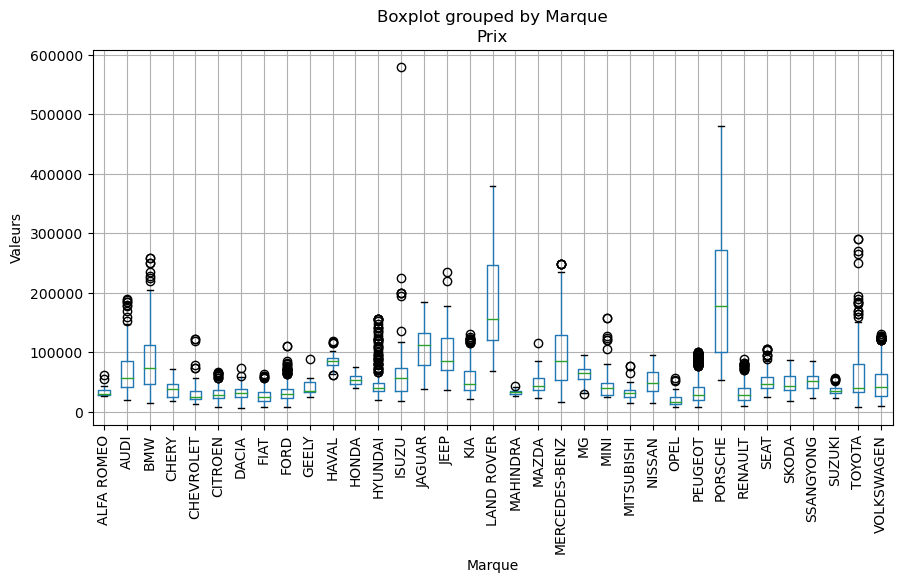

In [3]:
data=pd.read_excel("C:\\Users\\Mousser\\Desktop\\ScrappingSites\\PhaseDeNett\\data2.xlsx")
prepare=datapreparation()
data = data.loc[data.Kilometrage != 0]
data = data.loc[data.Annee!=0]
data = data.loc[data.PuissanceFiscale!=0]
data = data.loc[data.Prix!=0]
data= data.drop_duplicates()
data = prepare.extraire_top_car_per_column_name(data,"Marque",20)
data = prepare.extraire_top_car_per_column_name(data,"Modele",4)
df_cleaned = data.groupby('Marque').apply(prepare.remove_outliers,min_value=0.01,max_value=0.98).reset_index(drop=True) 
prepare.Boxplot_figure(df_cleaned)

<AxesSubplot:>

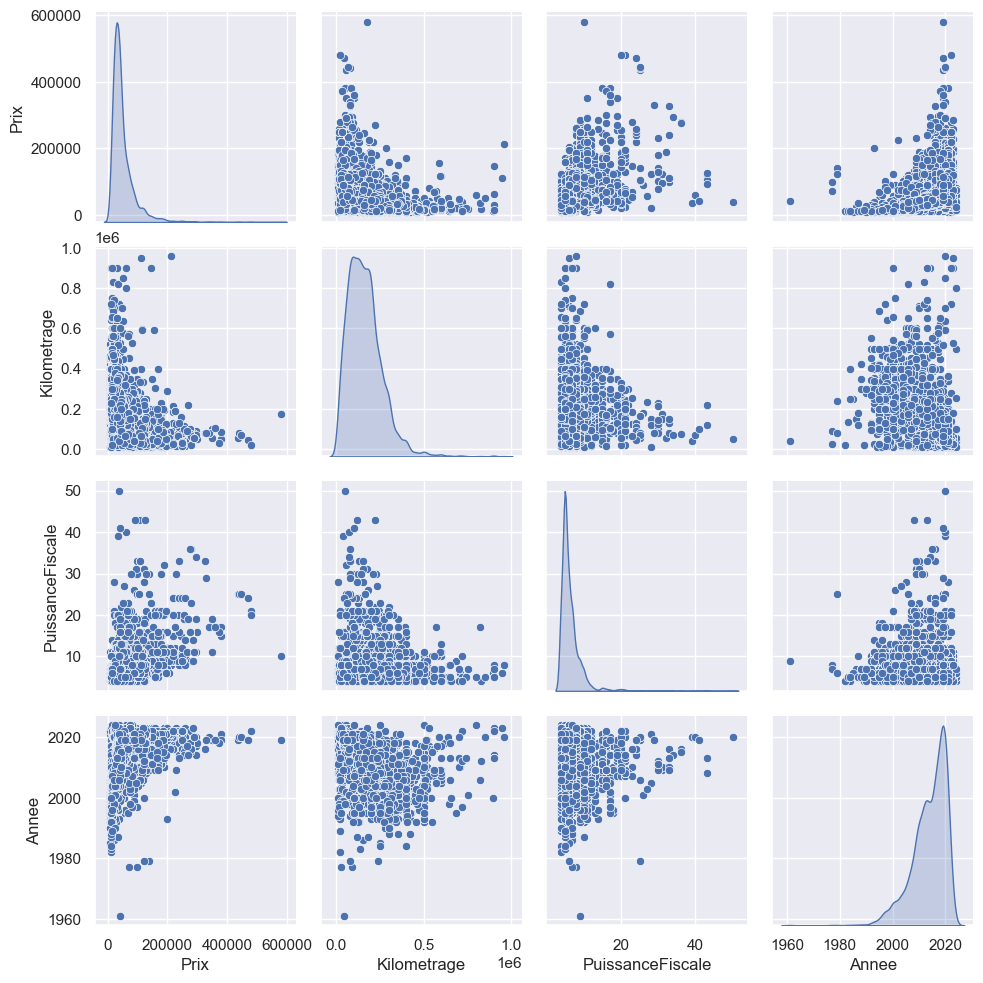

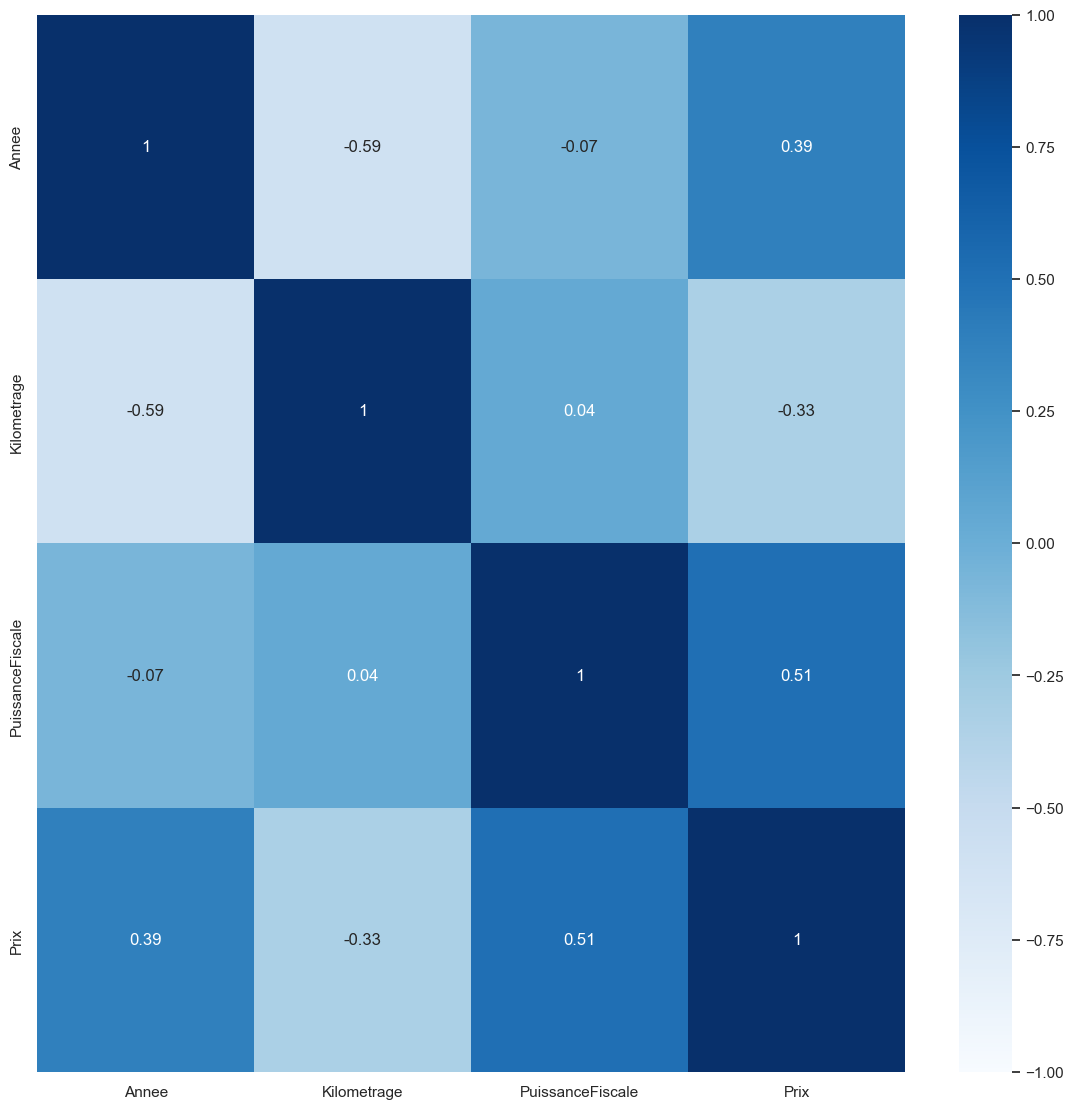

In [7]:
import seaborn as sns
sns.pairplot(df_cleaned[["Prix","Kilometrage","BoiteVitesse","PuissanceFiscale","Annee"]], diag_kind='kde')
f = plt.figure(figsize=(14, 14))
sns.set()
sns.heatmap(df_cleaned.corr().round(2),cmap="Blues", annot=True,vmin=-1,vmax=1)

In [20]:
from Predicter import Prediction
fileName = "data2.xlsx"
parentPath = os.path.dirname(os.getcwd())
filePath=os.path.join(parentPath, "Data", "DataPostCleaning",fileName)
data=pd.read_excel(filePath)
test = Prediction()
predictedDf,meanSquaredError,meanAbsoluteError = test.prediction_runner(data)
print(meanSquaredError)
print(meanAbsoluteError)


FileNotFoundError: [Errno 2] No such file or directory: '..\\RequirementsFiles\\modele_xgboost.pkl'